# Decision Boundaries for Different Classification Models

We will visualize the **decision boundaries** for two classification models:

- **K-Nearest Neighbors (KNN)** with `n_neighbors = 1, 5, and 10`.
- **Decision Tree** with `max_depth = 1, 5, and 10`.

These visualizations will help us understand how each model's complexity affects decision boundaries.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

### The Data

Below, the scikitlearn wine dataset from the videos is loaded and displayed.  You will follow the example using `['total_phenols', 'color_intensity']` as predictors.  The `make_plot` function will plot the decision boundary of a given estimator.

In [18]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [19]:
X1 = X[['total_phenols', 'color_intensity']]

In [20]:
def make_plot(estimator , ax):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    # plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    # sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'flare')
    ax.contourf(xx, yy, labels.reshape(XX.shape), cmap='twilight', alpha=0.6)
    sns.scatterplot(data=X1, x='total_phenols', y='color_intensity', hue=y, palette='flare', ax=ax)
    ax.set_title(f"KNN (n_neighbors={estimator.named_steps['model'].n_neighbors})")

- **K-Nearest Neighbors (KNN)** with `n_neighbors = 1, 5, and 10`.

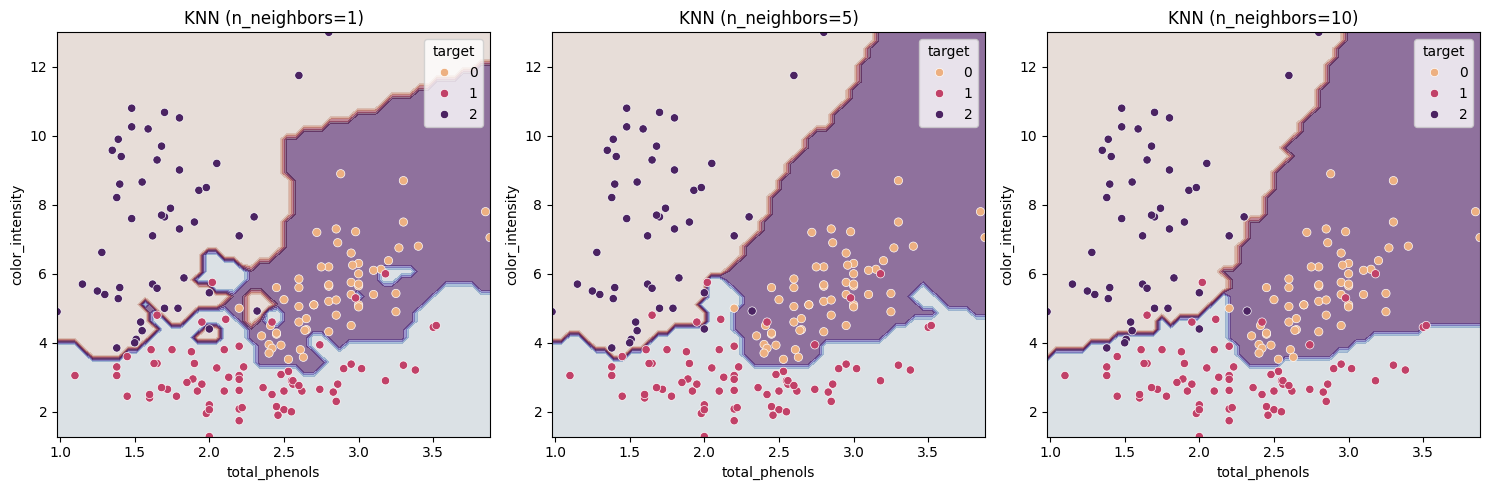

In [24]:
# Define three different pipelines with different values of n_neighbors
knn_pipe_1 = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=1))
])
knn_pipe_5 = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])
knn_pipe_10 = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=10))
])

# Fit the models
knn_pipe_1.fit(X1, y)
knn_pipe_5.fit(X1, y)
knn_pipe_10.fit(X1, y)

# Create subplots to plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each model on the respective axis
make_plot(knn_pipe_1, axes[0])
make_plot(knn_pipe_5, axes[1])
make_plot(knn_pipe_10, axes[2])

plt.tight_layout()
plt.show()

#### `DecisionTreeClassifier` with `max_depth = 1, 5, and 10`.

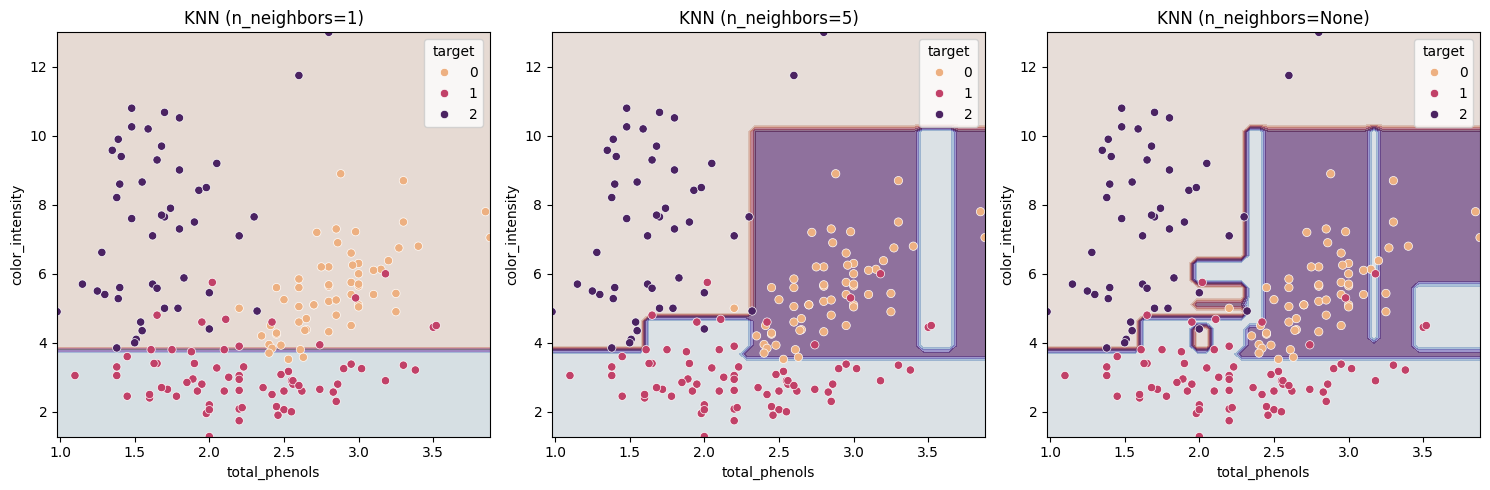

In [25]:
def make_plot_decisiontree(estimator , ax):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    # plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    # sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'flare')
    ax.contourf(xx, yy, labels.reshape(XX.shape), cmap='twilight', alpha=0.6)
    sns.scatterplot(data=X1, x='total_phenols', y='color_intensity', hue=y, palette='flare', ax=ax)
    ax.set_title(f"KNN (n_neighbors={estimator.max_depth})")


decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1).fit(X1, y)
decision_tree_depth_5 = DecisionTreeClassifier(max_depth=5).fit(X1, y)
decision_tree_depth_nolimit = DecisionTreeClassifier(max_depth=None).fit(X1, y)
    


# Create subplots to plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each model on the respective axis
make_plot_decisiontree(decision_tree_depth_1, axes[0])
make_plot_decisiontree(decision_tree_depth_5, axes[1])
make_plot_decisiontree(decision_tree_depth_nolimit, axes[2])

plt.tight_layout()
plt.show()
